## ABOUT APOLLO
### Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


### BUSINESS PROBLEM:
#### As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.
#### You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.
#### The company wants to know:
#### 1. Which variables are significant in predicting the reason for hospitalization for different regions
#### 2.How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("scaler_apollo_hospitals.csv")

In [3]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [4]:
df.shape

(1338, 8)

In [5]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [6]:
df.describe(include="all")

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,NaN,2,2,4,NaN,NaN,NaN
top,NaN,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,NaN,676,1064,364,NaN,NaN,NaN
mean,668.500000,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,386.391641,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,0.000000,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [8]:
df.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [9]:
df.nunique()

Unnamed: 0                 1338
age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df["severity level"]=df["severity level"].astype(object)

In [12]:
df.dtypes

Unnamed: 0                   int64
age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level              object
hospitalization charges      int64
dtype: object

<AxesSubplot:ylabel='smoker'>

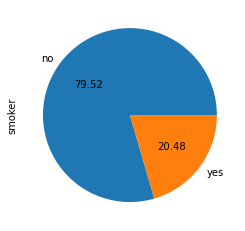

In [13]:
df["smoker"].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='sex'>

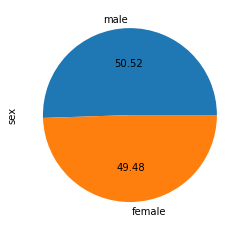

In [14]:
df["sex"].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:>

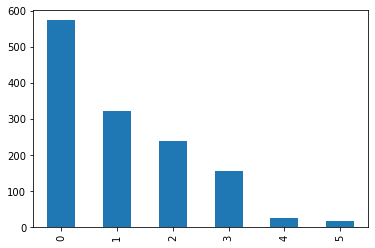

In [15]:
df["severity level"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='viral load', ylabel='Count'>

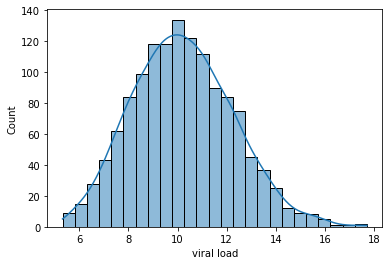

In [16]:
sns.histplot(df["viral load"],kde=True)

<AxesSubplot:xlabel='hospitalization charges', ylabel='Count'>

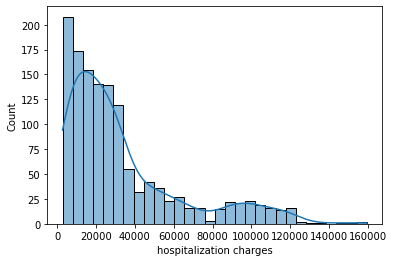

In [17]:
sns.histplot(df["hospitalization charges"],kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

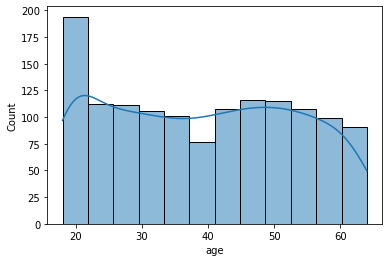

In [18]:
sns.histplot(df["age"],kde=True)

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

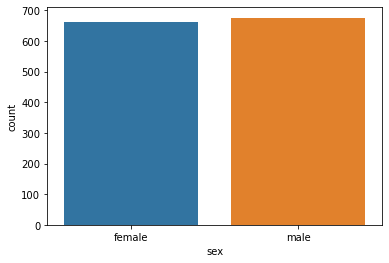

In [19]:
sns.countplot(df["sex"])

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospitalization charges'>

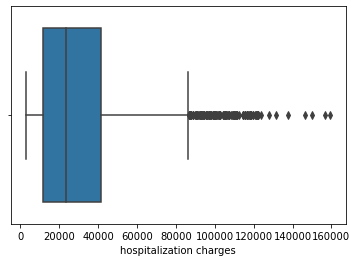

In [20]:
#Checking outliers
sns.boxplot(df["hospitalization charges"])

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='viral load'>

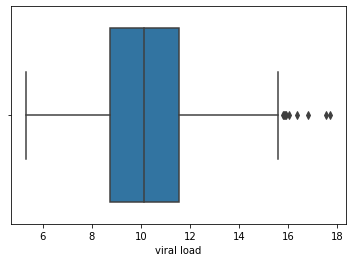

In [21]:
sns.boxplot(df["viral load"])

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

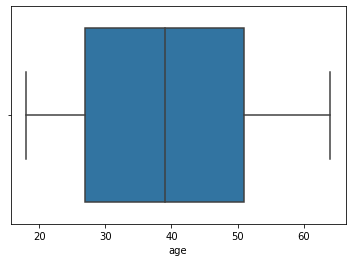

In [22]:
sns.boxplot(df["age"])

In [23]:
df.groupby("region")["smoker"].value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

In [25]:
df.groupby("region")["severity level"].value_counts()

region     severity level
northeast  0                 147
           1                  77
           2                  51
           3                  39
           4                   7
           5                   3
northwest  0                 132
           1                  74
           2                  66
           3                  46
           4                   6
           5                   1
southeast  0                 157
           1                  95
           2                  66
           3                  35
           5                   6
           4                   5
southwest  0                 138
           1                  78
           2                  57
           3                  37
           5                   8
           4                   7
Name: severity level, dtype: int64

<AxesSubplot:xlabel='sex,severity level'>

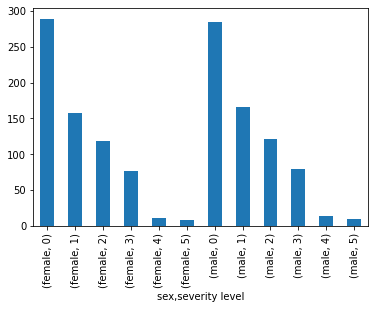

In [26]:
df.groupby("sex")["severity level"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

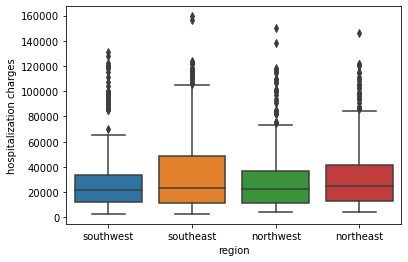

In [27]:
sns.boxplot(y="hospitalization charges", x="region", data=df)

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

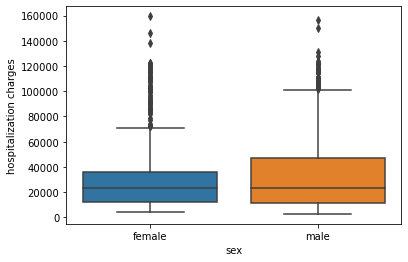

In [28]:
sns.boxplot(y="hospitalization charges", x="sex", data=df)

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

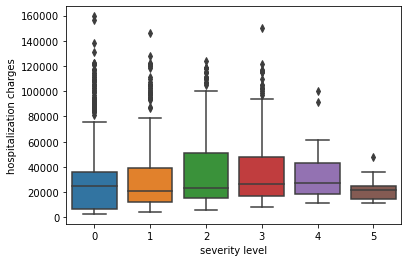

In [29]:
sns.boxplot(y="hospitalization charges", x="severity level", data=df)

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

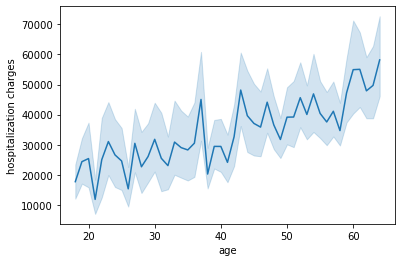

In [30]:
sns.lineplot(y="hospitalization charges", x="age", data=df)

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

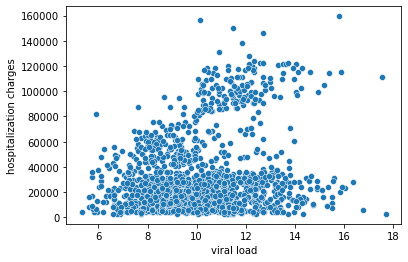

In [31]:
sns.scatterplot(y="hospitalization charges", x="viral load", data=df)

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

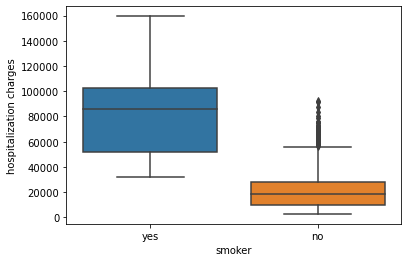

In [32]:
sns.boxplot(y="hospitalization charges", x="smoker" , data=df)

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

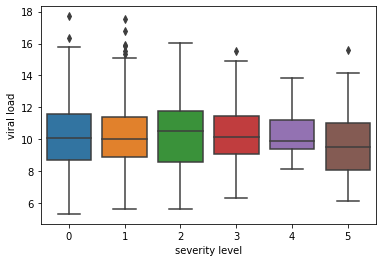

In [33]:
sns.boxplot(y="viral load", x="severity level" , data=df)

<AxesSubplot:xlabel='region', ylabel='viral load'>

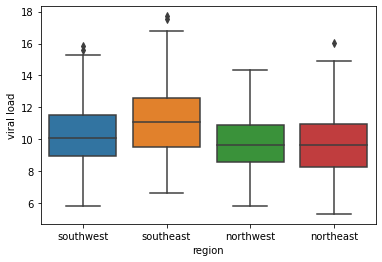

In [34]:
sns.boxplot(y="viral load", x="region" , data=df)

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

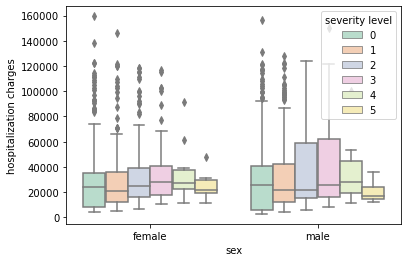

In [35]:
sns.boxplot(y="hospitalization charges", x="sex", hue="severity level", data=df,palette="Pastel2")

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

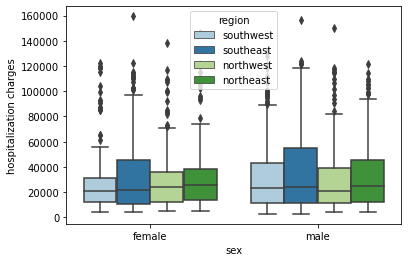

In [36]:
sns.boxplot(y="hospitalization charges", x="sex", hue="region", data=df,palette="Paired")

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

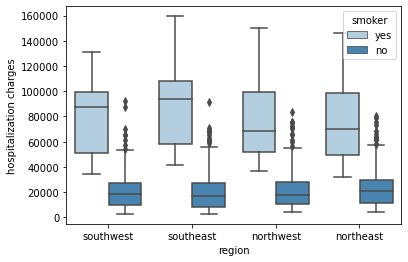

In [37]:
sns.boxplot(y="hospitalization charges", x="region", hue="smoker", data=df,palette="Blues")

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

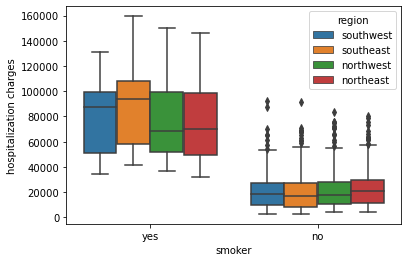

In [39]:
sns.boxplot(y="hospitalization charges", x="smoker", hue="region", data=df)

<AxesSubplot:xlabel='sex', ylabel='hospitalization charges'>

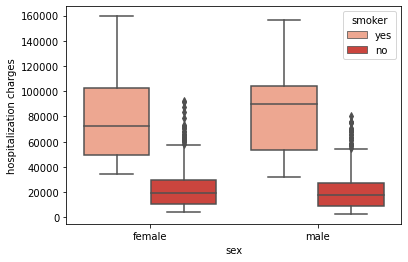

In [40]:
sns.boxplot(y="hospitalization charges", x="sex", hue="smoker", data=df,palette="Reds")

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

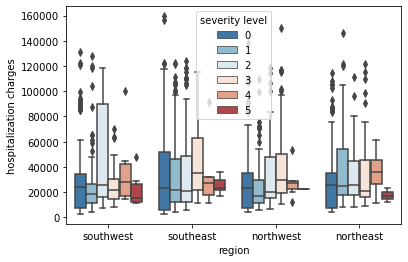

In [42]:
sns.boxplot(y="hospitalization charges", x="region", hue="severity level", data=df,palette="RdBu_r")

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

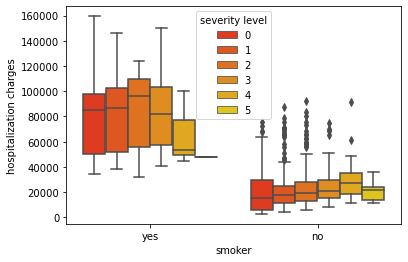

In [43]:
sns.boxplot(y="hospitalization charges", x="smoker", hue="severity level", data=df,palette="autumn")

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

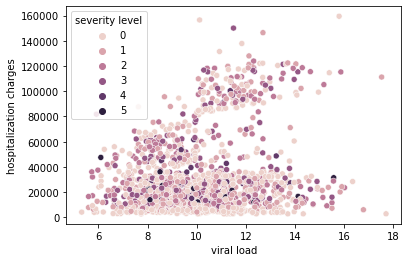

In [44]:
sns.scatterplot(y="hospitalization charges", x="viral load", data=df, hue="severity level")

In [45]:
#OUTLIERS TREATMENT
q1=df["viral load"].quantile(0.25)
q3=df["viral load"].quantile(0.75)
iqr=q3-q1
df1=df[(df["viral load"]<q1-1.5*iqr)|(df["viral load"]>q3+1.5*iqr)]
df1

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
116,116,58,male,no,southeast,16.35,0,28453
286,286,46,female,no,northeast,16.02,2,23582
401,401,47,male,no,southeast,15.84,1,20210
543,543,54,female,yes,southeast,15.80,0,159426
847,847,23,male,no,southeast,16.79,1,6095
860,860,37,female,yes,southwest,15.87,2,115284
1047,1047,22,male,yes,southeast,17.53,1,111253
1088,1088,52,male,no,southeast,15.91,1,24372
1317,1317,18,male,no,southeast,17.71,0,2909


In [46]:
q1=df["hospitalization charges"].quantile(0.25)
q3=df["hospitalization charges"].quantile(0.75)
iqr=q3-q1
df1=df[(df["hospitalization charges"]<q1-1.5*iqr)|(df["hospitalization charges"]>q3+1.5*iqr)]
df1

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
14,14,27,male,yes,southeast,14.04,0,99029
19,19,30,male,yes,southwest,11.77,0,92094
23,23,34,female,yes,northeast,10.64,1,94255
29,29,31,male,yes,southwest,12.10,2,96778
30,30,22,male,yes,southwest,11.87,0,88964
...,...,...,...,...,...,...,...,...
1300,1300,45,male,yes,southeast,10.12,0,156482
1301,1301,62,male,yes,northwest,10.29,3,116795
1303,1303,43,male,yes,southwest,9.27,0,94574
1313,1313,19,female,yes,southwest,11.57,2,90994


In [47]:
df=df.drop(columns=["Unnamed: 0"])

In [48]:
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


<AxesSubplot:>

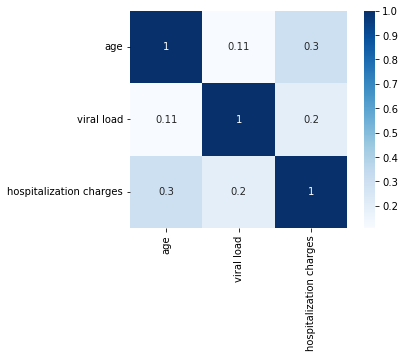

In [49]:
sns.heatmap(df.corr(method="pearson"),square=True,annot=True, cmap="Blues")

### Hypothesis Testing

In [ ]:
#H0:Average hospitalization charges of smokers and non-smokers are the same
#Ha: Average hospitalization charges are greater for smokers than non-smokers
#Right Tailed Test

In [50]:
smoker = df1[df1["smoker"]=="yes"]["hospitalization charges"]
nonsmoker = df1[df1["smoker"]=="no"]["hospitalization charges"]

In [51]:
np.var(smoker), np.var(nonsmoker)

(192654813.58737025, 3605556.2222222225)

C:\Users\Juee\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


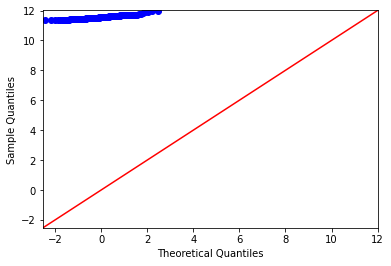

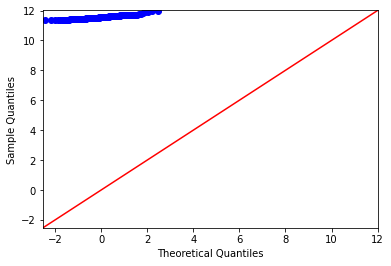

In [52]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(np.log(smoker), line ="45")

C:\Users\Juee\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


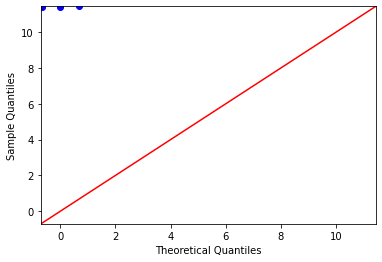

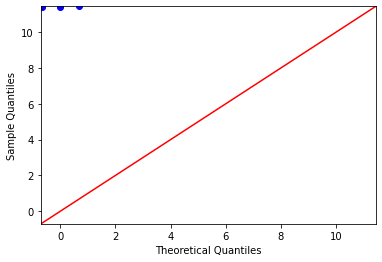

In [53]:
sm.qqplot(np.log(nonsmoker), line ="45")

In [55]:
alpha=0.05

In [58]:
from scipy.stats import ttest_ind
test_stat,pvalue=ttest_ind(np.log(smoker), np.log(nonsmoker), alternative="greater")

In [59]:
if pvalue <= alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject null hypothesis")

reject the null hypothesis


In [ ]:
#P-Value is < 0.05, we reject the null hypothesis.

#### Hypothesis testing : two tailed

In [ ]:
#H0:Viral load is of male and females is equal
#Ha:Viral load for male and female is not equal
#alpha:0.05

In [60]:
male_viral_load = df1[df1['sex']=='male']['viral load']
female_viral_load = df1[df1['sex']=='female']['viral load']

In [61]:
np.var(male_viral_load), np.var(female_viral_load)

(2.1696808483777295, 2.1584755600000007)

C:\Users\Juee\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


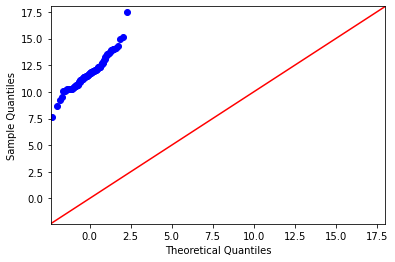

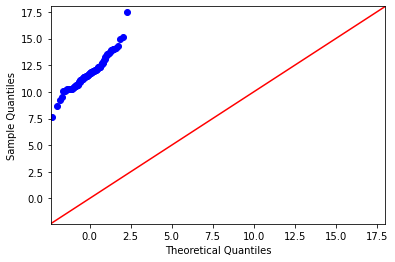

In [62]:
sm.qqplot((male_viral_load), line ='45')

C:\Users\Juee\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


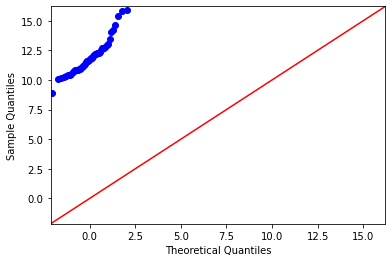

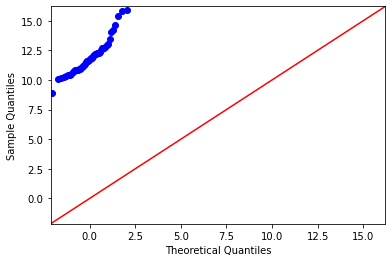

In [63]:
sm.qqplot((female_viral_load), line ='45')

In [66]:
tstat,pval=ttest_ind(np.log(male_viral_load), np.log(female_viral_load), alternative='two-sided')

In [67]:
if pval <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


### Hypothesis testing: chi-square

In [68]:
#H0:Proportion of smoking is same across different the regions
#Ha:Proportion of smoking isn ot the same for different regions
alpha=0.05
crosstab=pd.crosstab(df["smoker"], df["region"])

In [69]:
crosstab

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [72]:
alpha=0.05
from scipy.stats import chi2_contingency
chi2, p_val, dof, exp_freq = chi2_contingency(crosstab)
print("chi2:", chi2)
print("p-value:",pval) 
print("dof:",dof)
print("exp_freq:",exp_freq)

chi2: 7.34347776140707
p-value: 0.06171954839170547
dof: 3
exp_freq: [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


In [73]:
if p_val <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


### One way ANOVA

In [76]:
#Examining if the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is the same
#H0:Average viral load is similar for females with severity level 0, 1 and 2.
#Ha:
from scipy.stats import f_oneway
severity0=df1[df1["severity level"]==0]["viral load"]
severity1=df1[df1["severity level"]==1]["viral load"]
severity2=df1[df1["severity level"]==2]["viral load"]

In [77]:
np.var(severity0), np.var(severity1),np.var(severity2)

(2.2617501479289945, 2.6205991210937505, 1.8653647058823524)

In [80]:
stat,p_value=f_oneway(severity0,severity1,severity2)

In [81]:
f_oneway(severity0,severity1,severity2)
if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis
